In [1]:
from google.colab import drive

# Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

file_path = '/content/drive/My Drive/modified_dataset/us_project_final_dataset.csv'

us_ds = pd.read_csv(file_path, sep=',')

us_ds.head(100)

,state_code_0,state_code_1,state_code_2,state_code_3,state_code_4,state_code_5,property_type_0,property_type_1,property_type_2,median_sale_price,...,median_list_price,median_ppsf,median_list_ppsf,avg_sale_to_list,sold_above_list,sale_to_list_ratio,sin_year,cos_year,sin_month,cos_month
0,0,0,0,0,0,1,0,0,1,-0.374561,...,-0.208773,-0.106914,-0.015376,-0.216742,-0.029813,-0.125209,0.573151,1.273751,-1.345297,0.094627
1,0,0,0,0,1,0,0,1,0,0.349894,...,0.131598,0.027611,0.045262,-0.052589,0.349915,0.053787,1.103099,-0.638699,-0.637291,-1.137098
2,0,0,0,0,1,1,0,1,0,-0.356891,...,-0.252977,-0.056876,-0.083672,0.769254,0.850733,0.059784,0.573151,-1.151138,-1.155588,-0.616510
3,0,0,0,1,0,0,0,1,0,0.470368,...,0.224250,0.000360,-0.060149,0.091501,-0.490964,0.003292,1.103099,0.761311,-1.155588,-0.616510
4,0,0,0,1,0,1,0,1,0,-0.605872,...,-0.394607,-0.075282,-0.135217,-0.490857,-0.596074,0.098951,-0.874693,-1.151138,0.778721,1.326353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,1,1,0,1,1,0,0,0.614938,...,0.291617,0.188111,0.211821,0.845293,0.980575,0.025559,-1.404641,-0.638699,-0.637291,-1.137098
96,0,0,1,0,1,1,1,0,0,-0.244448,...,-0.164746,-0.030393,-0.062615,0.295494,0.510632,-0.027308,1.103099,-0.638699,0.778721,1.326353
97,0,0,0,1,0,0,1,0,0,-0.521540,...,0.029841,0.064302,0.168451,-2.033189,-1.226734,-0.808543,-1.598615,0.061306,-1.345297,0.094627
98,0,1,1,0,1,0,1,0,0,-0.329583,...,-0.558074,-0.054269,-0.211645,-0.065575,-1.226734,3.647632,-1.404641,-0.638699,0.070715,-1.327647


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [11]:
y = us_ds['median_sale_price']

X = us_ds.drop(columns=['median_sale_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
print(f"MLP Mean Squared Error: {mlp_mse}")

MLP Mean Squared Error: 0.012069494427731918


In [14]:
import matplotlib.pyplot as plt
import numpy as np

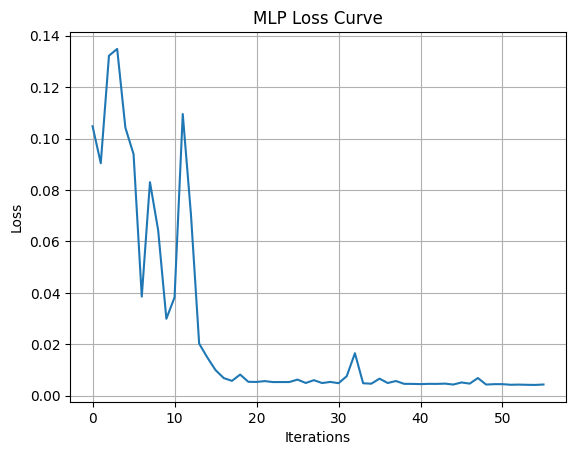

In [15]:
# Plot the loss curve
plt.plot(mlp_model.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

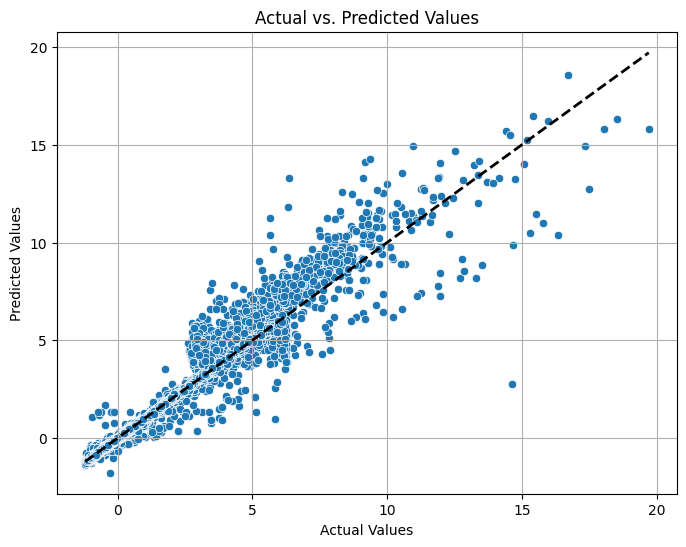

In [16]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=mlp_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal reference line
plt.grid(True)
plt.show()

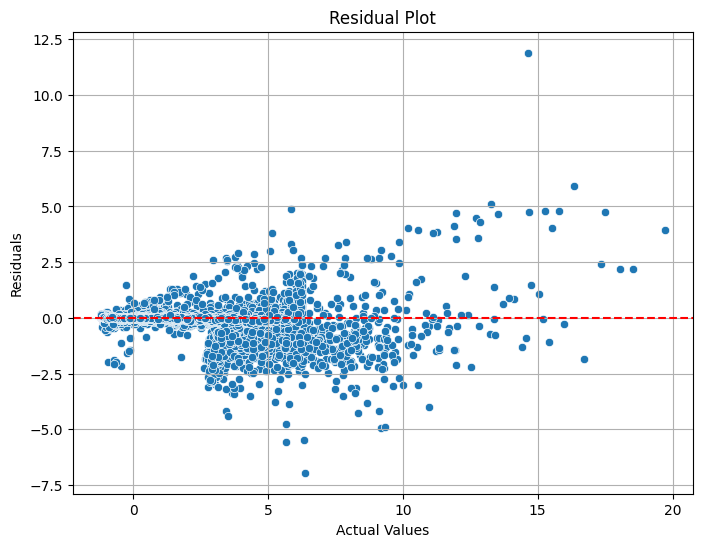

In [17]:
residuals = y_test - mlp_predictions

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [18]:
mse_denormalized = mlp_mse * 310917 * 310917

In [19]:
print(mse_denormalized)

1166750553.9720798


In [32]:
mlp_predictions_denorm = mlp_predictions * 310917  + 376118
y_test_denorm = y_test * 310917  + 376118

In [33]:
from sklearn.metrics import mean_squared_error

denorm_mse = mean_squared_error(y_test_denorm, mlp_predictions_denorm)
print(f"Denormalized MSE: {denorm_mse}")

Denormalized MSE: 1166750553.9720793


In [35]:
from sklearn.metrics import mean_absolute_error

denorm_mae = mean_absolute_error(y_test_denorm, mlp_predictions_denorm)
print(f"Denormalized MAE: {denorm_mae}")

Denormalized MAE: 6855.9591224964115


In [41]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, mlp_predictions)
print(f"MAE: {mae}")

MAE: 0.022050769570323953


In [42]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, mlp_predictions)
print(f"R²: {r2}")

R²: 0.9875581700356271
